In [22]:
#Importing packages
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import datetime
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import requests # library to handle requests

print("Libraries imported!")

Libraries imported!


In [11]:
df = pd.read_csv('data/clean_20000.csv', index_col=0)
print(df.shape)
df.head()

(22441, 17)


,Name,Mileage,Address,Rating,Fuel Type,City MPG,Highway MPG,Drivetrain,Engine,Exterior Color,Interior Color,Transmission,Num_ent_features,Num_safe_features,Price,Model Year,Make
0,2012 Volvo S60 T5,91476,"Kansas City, MO 64111",5.0,Gasoline,20.0,30.0,FWD,2.5L,Black,Black,Automatic,2,2,9995,2012,Volvo
1,2019 Ford Escape SE,56976,"North Kansas City, MO 64116",4.7,Gasoline,23.0,30.0,FWD,1.5L,Blue,Gray,Automatic,2,3,16500,2019,Ford
2,2017 Dodge Grand Caravan SXT,45892,"Kansas City, MO 64116",4.8,E85 Flex Fuel,17.0,25.0,FWD,3.6L,Other,Black,Automatic,1,3,17500,2017,Dodge
3,2020 Volvo XC40 T5 R-Design,11103,"KCMO, MO 64105",4.2,Gasoline,22.0,30.0,AWD,2.0L,White,Black,Automatic,2,4,41590,2020,Volvo
4,2020 INFINITI QX60 Luxe,33903,"KCMO, MO 64105",4.2,Gasoline,19.0,26.0,AWD,3.5L,Black,Other,Automatic,2,4,29990,2020,INFINITI


In [12]:
df = df[['Make', 'Model Year', 'Mileage', 'Address', 'Rating', 'Fuel Type', 'City MPG', 'Highway MPG', 'Drivetrain', 'Engine', 'Exterior Color',
        'Interior Color', 'Transmission', 'Num_ent_features', 'Num_safe_features', 'Price']]

In [13]:
numeric_subset = ['Model Year', 'Mileage', 'Rating', 'City MPG', 'Highway MPG', 'Num_ent_features', 'Num_safe_features', 'Price']

In [14]:
sub_df = df.loc[:,numeric_subset]
sub_df.head()

,Model Year,Mileage,Rating,City MPG,Highway MPG,Num_ent_features,Num_safe_features,Price
0,2012,91476,5.0,20.0,30.0,2,2,9995
1,2019,56976,4.7,23.0,30.0,2,3,16500
2,2017,45892,4.8,17.0,25.0,1,3,17500
3,2020,11103,4.2,22.0,30.0,2,4,41590
4,2020,33903,4.2,19.0,26.0,2,4,29990


In [15]:
sub_df.corr()

,Model Year,Mileage,Rating,City MPG,Highway MPG,Num_ent_features,Num_safe_features,Price
Model Year,1.000000,-0.793775,-0.031535,0.062661,0.009590,0.324598,0.536341,0.284273
Mileage,-0.793775,1.000000,-0.002507,-0.101878,-0.032232,-0.284688,-0.466676,-0.315558
Rating,-0.031535,-0.002507,1.000000,0.018048,0.021288,0.000212,0.030804,0.027970
City MPG,0.062661,-0.101878,0.018048,1.000000,0.384168,-0.032059,0.150872,-0.126597
Highway MPG,0.009590,-0.032232,0.021288,0.384168,1.000000,-0.011309,0.043320,-0.011845
Num_ent_features,0.324598,-0.284688,0.000212,-0.032059,-0.011309,1.000000,0.225411,0.249637
Num_safe_features,0.536341,-0.466676,0.030804,0.150872,0.043320,0.225411,1.000000,0.060233
Price,0.284273,-0.315558,0.027970,-0.126597,-0.011845,0.249637,0.060233,1.000000


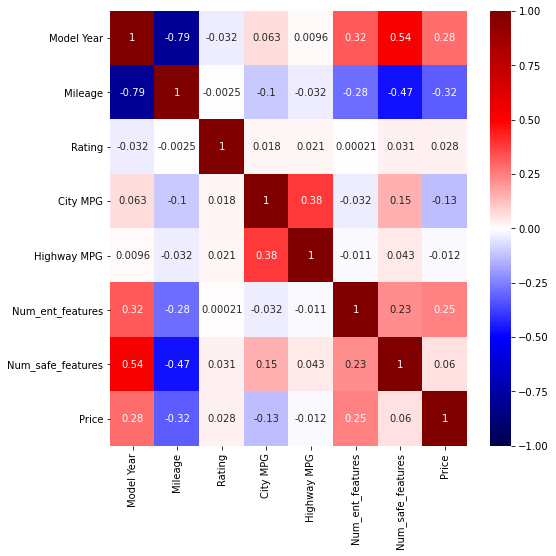

In [16]:
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(sub_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

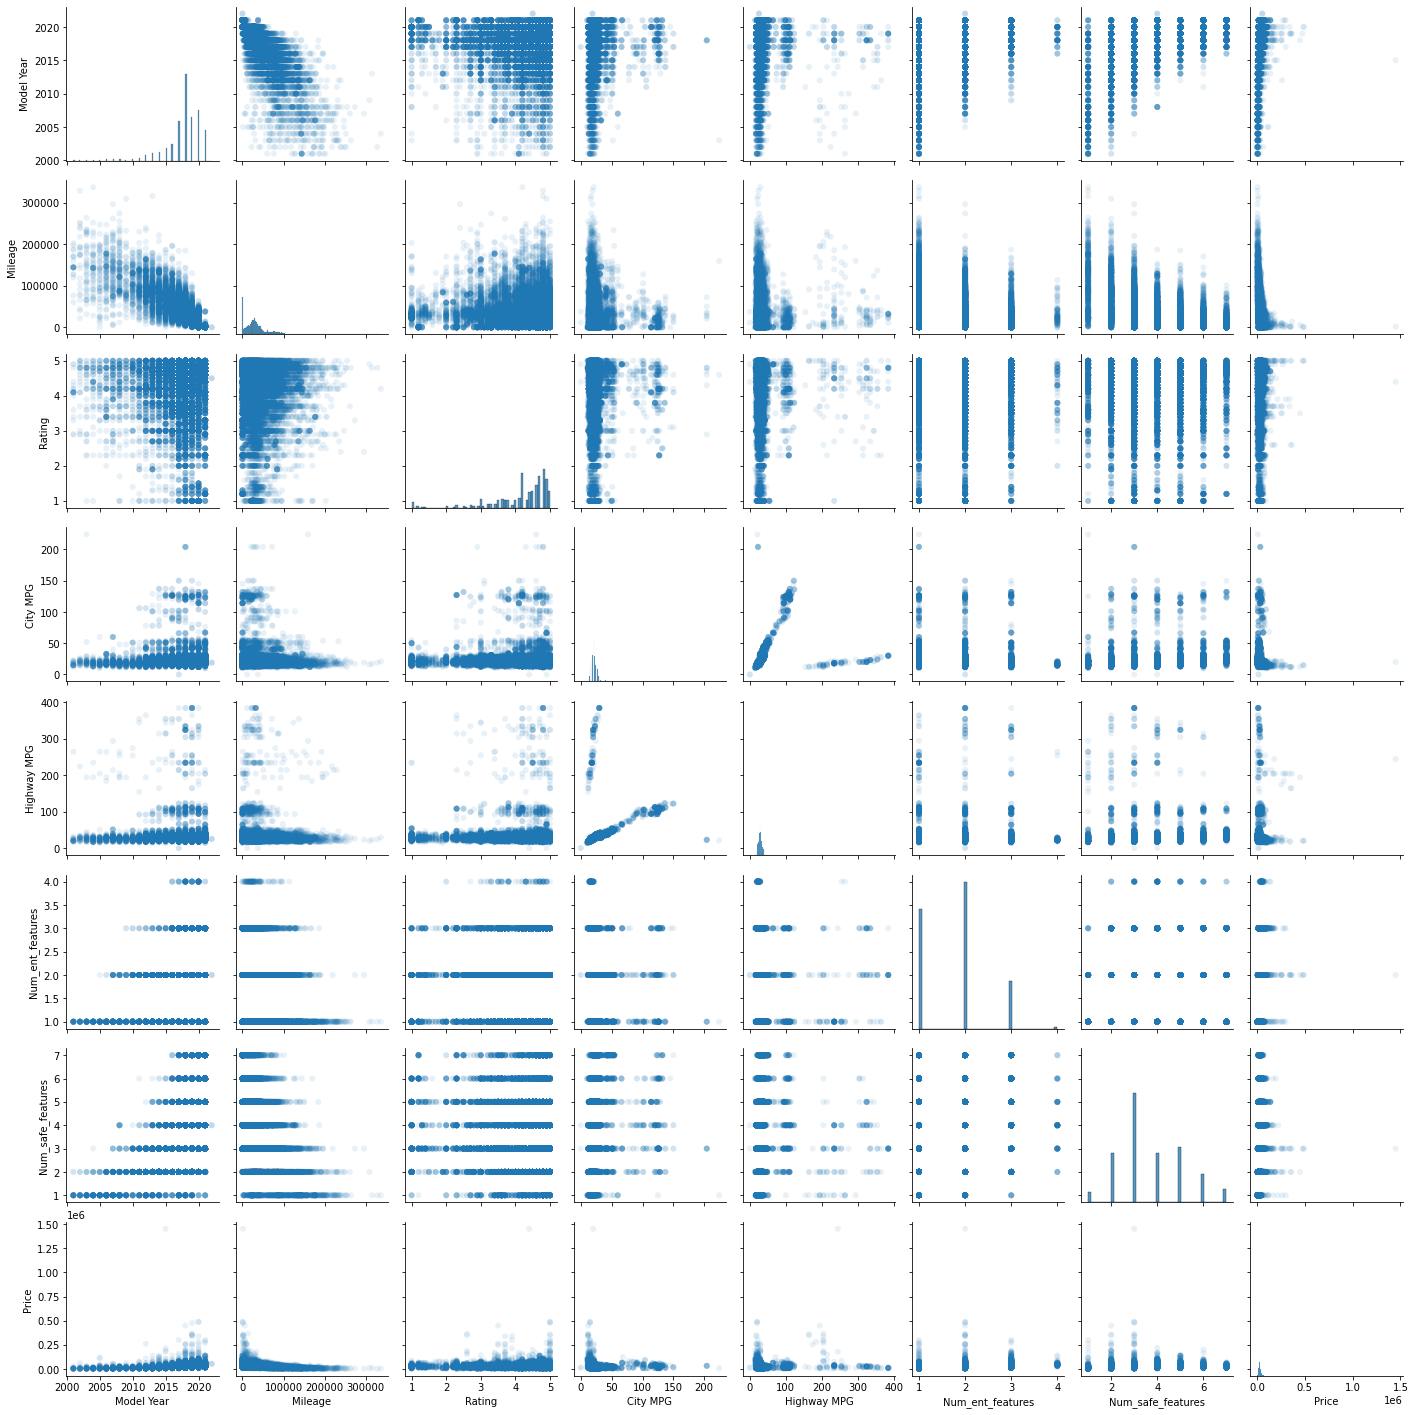

In [25]:
sns.pairplot(sub_df, plot_kws=dict(alpha=.1, edgecolor='none'))

In [19]:
X_df = sub_df[['Model Year', 'Mileage', 'Rating', 'City MPG', 'Highway MPG', 'Num_ent_features', 'Num_safe_features']]
y_df = sub_df['Price']

In [23]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
        

In [24]:
split_and_validate(X_df, y_df)


Validation R^2 score was: 0.20894219640085432
Feature coefficient results: 

Model Year : 720.82
Mileage : -0.16
Rating : 852.57
City MPG : -243.31
Highway MPG : 47.71
Num_ent_features : 4970.29
Num_safe_features : -1931.33


In [33]:

df.head()

,Make,Model Year,Mileage,Address,Rating,Fuel Type,City MPG,Highway MPG,Drivetrain,Engine,Exterior Color,Interior Color,Transmission,Num_ent_features,Num_safe_features,Price
0,Volvo,2012,91476,"Kansas City, MO 64111",5.0,Gasoline,20.0,30.0,FWD,2.5L,Black,Black,Automatic,2,2,9995
1,Ford,2019,56976,"North Kansas City, MO 64116",4.7,Gasoline,23.0,30.0,FWD,1.5L,Blue,Gray,Automatic,2,3,16500
2,Dodge,2017,45892,"Kansas City, MO 64116",4.8,E85 Flex Fuel,17.0,25.0,FWD,3.6L,Other,Black,Automatic,1,3,17500
3,Volvo,2020,11103,"KCMO, MO 64105",4.2,Gasoline,22.0,30.0,AWD,2.0L,White,Black,Automatic,2,4,41590
4,INFINITI,2020,33903,"KCMO, MO 64105",4.2,Gasoline,19.0,26.0,AWD,3.5L,Black,Other,Automatic,2,4,29990


In [28]:
pd.get_dummies(df.Make).head()

,Acura,Alfa Romeo,Audi,BMW,Buick,Cadillac,Chevrolet,Chrysler,Dodge,Ford,...,Nissan,Other,Porsche,RAM,Scion,Subaru,Tesla,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
X2 = X_df.copy()
X2['Make'] = df['Make']
split_and_validate(pd.get_dummies(X2), y_df)


Validation R^2 score was: 0.4165002442612248
Feature coefficient results: 

Model Year : 1361.07
Mileage : -0.10
Rating : 521.47
City MPG : -250.25
Highway MPG : 43.99
Num_ent_features : 4365.84
Num_safe_features : -632.68
Make_Acura : -8355.84
Make_Alfa Romeo : -8537.68
Make_Audi : -1459.88
Make_BMW : -209.30
Make_Buick : -11332.81
Make_Cadillac : -2799.73
Make_Chevrolet : -4280.82
Make_Chrysler : -10710.17
Make_Dodge : -8451.66
Make_Ford : -3384.87
Make_GMC : 1778.07
Make_Genesis : -4312.21
Make_Honda : -9089.68
Make_Hyundai : -14835.04
Make_INFINITI : -5112.25
Make_Jaguar : 2293.14
Make_Jeep : -6558.10
Make_Kia : -13842.54
Make_Land Rover : 21583.15
Make_Lexus : -1539.19
Make_Lincoln : -4229.05
Make_MINI Cooper : -11278.11
Make_Maserati : 7806.86
Make_Mazda : -11759.06
Make_Mercedes-Benz : 1067.48
Make_Mitsubishi : -16728.79
Make_Nissan : -11963.27
Make_Other : 95774.82
Make_Porsche : 36395.41
Make_RAM : 7905.89
Make_Scion : -11513.42
Make_Subaru : -10019.20
Make_Tesla : 35601.42
M

In [34]:
df['Fuel Type'].value_counts()

 Gasoline         19790
 Hybrid            1163
 E85 Flex Fuel      652
 Diesel             456
 Electric           380
Name: Fuel Type, dtype: int64

In [35]:
X3 = X2.copy()

X3['Fuel Type'] = df['Fuel Type']

split_and_validate(pd.get_dummies(X3), y_df)


Validation R^2 score was: 0.45607286027270943
Feature coefficient results: 

Model Year : 1437.91
Mileage : -0.10
Rating : 449.48
City MPG : -503.71
Highway MPG : 42.79
Num_ent_features : 3890.46
Num_safe_features : -534.73
Make_Acura : -7521.44
Make_Alfa Romeo : -7393.16
Make_Audi : -634.44
Make_BMW : -689.79
Make_Buick : -10214.31
Make_Cadillac : -2231.92
Make_Chevrolet : -4768.81
Make_Chrysler : -9947.21
Make_Dodge : -8153.27
Make_Ford : -3585.79
Make_GMC : 279.01
Make_Genesis : -4280.48
Make_Honda : -7196.53
Make_Hyundai : -13212.35
Make_INFINITI : -4806.24
Make_Jaguar : 1178.63
Make_Jeep : -6384.35
Make_Kia : -13386.73
Make_Land Rover : 20899.46
Make_Lexus : -911.16
Make_Lincoln : -3499.44
Make_MINI Cooper : -9625.10
Make_Maserati : 7311.93
Make_Mazda : -10155.74
Make_Mercedes-Benz : 1874.16
Make_Mitsubishi : -15417.89
Make_Nissan : -10804.59
Make_Other : 95773.16
Make_Porsche : 36673.51
Make_RAM : 2057.66
Make_Scion : -9373.29
Make_Subaru : -8279.88
Make_Tesla : 22211.33
Make_To

In [36]:
df.head()

,Make,Model Year,Mileage,Address,Rating,Fuel Type,City MPG,Highway MPG,Drivetrain,Engine,Exterior Color,Interior Color,Transmission,Num_ent_features,Num_safe_features,Price
0,Volvo,2012,91476,"Kansas City, MO 64111",5.0,Gasoline,20.0,30.0,FWD,2.5L,Black,Black,Automatic,2,2,9995
1,Ford,2019,56976,"North Kansas City, MO 64116",4.7,Gasoline,23.0,30.0,FWD,1.5L,Blue,Gray,Automatic,2,3,16500
2,Dodge,2017,45892,"Kansas City, MO 64116",4.8,E85 Flex Fuel,17.0,25.0,FWD,3.6L,Other,Black,Automatic,1,3,17500
3,Volvo,2020,11103,"KCMO, MO 64105",4.2,Gasoline,22.0,30.0,AWD,2.0L,White,Black,Automatic,2,4,41590
4,INFINITI,2020,33903,"KCMO, MO 64105",4.2,Gasoline,19.0,26.0,AWD,3.5L,Black,Other,Automatic,2,4,29990


In [37]:
X4 = X3.copy()

X4[['Drivetrain', 'Engine', 'Exterior Color', 'Interior Color', 'Transmission']] = df[['Drivetrain', 'Engine', 'Exterior Color', 'Interior Color', 'Transmission']]
X4.head()

,Model Year,Mileage,Rating,City MPG,Highway MPG,Num_ent_features,Num_safe_features,Make,Fuel Type,Drivetrain,Engine,Exterior Color,Interior Color,Transmission
0,2012,91476,5.0,20.0,30.0,2,2,Volvo,Gasoline,FWD,2.5L,Black,Black,Automatic
1,2019,56976,4.7,23.0,30.0,2,3,Ford,Gasoline,FWD,1.5L,Blue,Gray,Automatic
2,2017,45892,4.8,17.0,25.0,1,3,Dodge,E85 Flex Fuel,FWD,3.6L,Other,Black,Automatic
3,2020,11103,4.2,22.0,30.0,2,4,Volvo,Gasoline,AWD,2.0L,White,Black,Automatic
4,2020,33903,4.2,19.0,26.0,2,4,INFINITI,Gasoline,AWD,3.5L,Black,Other,Automatic


In [38]:
pd.get_dummies(X4)

,Model Year,Mileage,Rating,City MPG,Highway MPG,Num_ent_features,Num_safe_features,Make_Acura,Make_Alfa Romeo,Make_Audi,...,Exterior Color_White,Interior Color_Black,Interior Color_Charcoal,Interior Color_Ebony,Interior Color_Graphite,Interior Color_Gray,Interior Color_Other,Transmission_Automatic,Transmission_Manual,Transmission_Unknown
0,2012,91476,5.0,20.0,30.0,2,2,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,2019,56976,4.7,23.0,30.0,2,3,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,2017,45892,4.8,17.0,25.0,1,3,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,2020,11103,4.2,22.0,30.0,2,4,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,2020,33903,4.2,19.0,26.0,2,4,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27166,2007,153131,4.6,30.0,38.0,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
27167,2006,93514,4.5,16.0,194.0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
27171,2016,127717,4.8,21.0,28.0,1,3,0,0,0,...,1,1,0,0,0,0,0,1,0,0
27172,2014,48130,4.8,21.0,29.0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [39]:
split_and_validate(pd.get_dummies(X4), y_df)


Validation R^2 score was: 0.6480579038740875
Feature coefficient results: 

Model Year : 1635.46
Mileage : -0.11
Rating : 460.27
City MPG : -135.01
Highway MPG : 70.01
Num_ent_features : 2290.04
Num_safe_features : -353.63
Make_Acura : -5886.83
Make_Alfa Romeo : -3836.72
Make_Audi : 896.72
Make_BMW : -63.39
Make_Buick : -4822.44
Make_Cadillac : -3332.54
Make_Chevrolet : -7060.86
Make_Chrysler : -6739.84
Make_Dodge : -10080.60
Make_Ford : -5394.27
Make_GMC : -5185.06
Make_Genesis : -17338.18
Make_Honda : -3725.60
Make_Hyundai : -8917.91
Make_INFINITI : -7187.81
Make_Jaguar : 475.24
Make_Jeep : -6578.54
Make_Kia : -8639.32
Make_Land Rover : 12599.04
Make_Lexus : -2265.76
Make_Lincoln : -175.58
Make_MINI Cooper : -3215.01
Make_Maserati : 2718.33
Make_Mazda : -7428.47
Make_Mercedes-Benz : 2533.83
Make_Mitsubishi : -12984.25
Make_Nissan : -10645.90
Make_Other : 89102.02
Make_Porsche : 34216.24
Make_RAM : -7334.21
Make_Scion : -1626.23
Make_Subaru : -8035.90
Make_Tesla : 21295.79
Make_Toyot